# Introduction

### Data description:

The data contains 110,527 records of patients that showed or not for the appointment. The table contains 14 columns (Characteristics) thay may affect if the patient will show or not.

### Columns:

- PatientId : Identification of a patient.
- AppointmentID : Identification for each appointment.
- Gender : Female or MAle.
- ScheduledDay : The day someone called or registered the appointment.
- AppointmentDay : The day of the actuall appointment.
- Age : Age of the patient.
- Neighbourhood : Where the appointment takes place.
- Scholarship : True of False.
- Hipertension : True of False.
- Diabetes : True of False.
- Alcoholism : True of False.
- Handcap : True of False.
- SMS_received : True of False.
- No-show : (Yes) means if the patient did not show for the appointment, (No) means if the patient show for the appointment.

# Questions for Analysis

After reading about the dataset, some of the questions can come in mind:
* 1- How many patients did show or not for the appointmnet?
* 2- What is the age distribution of the patients?
* 3- Does The Gender May Affect If the patient Will Show Up For The Appointment or Not?
* 4- Does Younger Patients Show Up To The Appointment More Than Older Patients or Not?
* 5- Does Having A Scholarship Affect If The Patient Will Show For The Appointment or Not?
* 6- Does Sending an SMS Will Increase The Prcentage Of Showing Up To The Appointment?


# Data Wrangling

Cleaning the data is a very important step before starting exploring the data. These are the steps that I have done in order to clean the data.

Steps:
- Loading the data.
- Check for NaN values.
- Solve the outlier.
- Change "PatientId" type from ( float ) to ( int ).
- Change the formate and data type for "ScheduledDay" and "AppointmentDay".
- Solve Handcap Values.
- Reset indexes.
    

## Loading the data

In [1]:
# import the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# downloaded the data from kaggle ( https://www.kaggle.com/datasets/joniarroba/noshowappointments )
df = pd.read_csv("KaggleV2-May-2016.csv") # read the dataset ( csv file )
df.head() # print the first 5 rows from the dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info() # printing how many rows and columns and the data type for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe() # print the mean, std, min, 1st quartile, 2nd quartile, 3rd quartile, and max. To have a good look
              # into the dataset values, and to notice if there is/are outliers. 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.shape # print (number of rows, number of columns).

(110527, 14)

In [6]:
df.nunique() # to print how many unique values in each column.

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

## Check if there is/are NaN values

#### Using the .info() function, we can see if there is/are NaN vaues or not in the dataset by noticing if there is a number not equal to the total number of row.

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Here another way to check for NaN values using .isnull() function and then .sum() the number of values to make it easier to notice how many NaN values we have in each column.

In [8]:
# check if there is / are NaN values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Here to check again using another way to print True (if there is/are NaN values) or False (no NaN values).

In [9]:
# make sure there is no NaN value/s
df.isnull().values.any()

False

## Solve the outlier of age = -1 

#### Here we can see in the Age column that the minimum Age is ( -1 ) which is not correct having an Age ( -1 ). One of the ways we can solve this problem is by dropping this row.

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Here to look at the row having an Age of ( -1 ).

In [11]:
outlier = df[ df["Age"] == -1 ]
outlier

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### Using the index of this row (99832) to get the full number of PatientId incase if the patient booked another appointment/s.

In [12]:
# to get the full ID of the patient incase if the patient may booked other appointment/s or not
df["PatientId"].iloc[99832]

465943158731293.0

#### Here to get all appointment/s that the patient booked.

In [13]:
# search for the patient if he/she has booked another appointment/s
df [ df["PatientId"] == 465943158731293]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


--------
** it showed that the patient only exists once, also the patient did not show for the appointment and he/she had no scholarship ... *removing this outlier is the best* *
*****

#### To drop the row using the index (99832).

In [14]:
df.drop(99832, inplace = True)

#### Here to check again if the minimum Age is not ( -1 ).

In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### To check if the number of rows decreased by 1 or not after dropping the row.

In [16]:
df.shape # yes we can see that number of rows has decreased from 110527 to 110526.

(110526, 14)

## Change "PatientId" type from ( float ) to ( int ).

#### As we can see here, that the data type for PatientId is float, which not efficient. The better way to solve this issue is by converting the data type from float to integer ( int ).

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


#### Using the .astype() function, we can convert from float to integer ( int ).

In [18]:
df['PatientId'] = df['PatientId'].astype(int)

#### To check if the data type for PatientId has benn changed to integer ( int ) or not.

In [19]:
df.info() # yes we can see now the data type for PatientId is (int64).

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110526 non-null  int64 
 1   AppointmentID   110526 non-null  int64 
 2   Gender          110526 non-null  object
 3   ScheduledDay    110526 non-null  object
 4   AppointmentDay  110526 non-null  object
 5   Age             110526 non-null  int64 
 6   Neighbourhood   110526 non-null  object
 7   Scholarship     110526 non-null  int64 
 8   Hipertension    110526 non-null  int64 
 9   Diabetes        110526 non-null  int64 
 10  Alcoholism      110526 non-null  int64 
 11  Handcap         110526 non-null  int64 
 12  SMS_received    110526 non-null  int64 
 13  No-show         110526 non-null  object
dtypes: int64(9), object(5)
memory usage: 12.6+ MB


## Change the formate and data type for "ScheduledDay" and "AppointmentDay" 

To better visualization, the "ScheduledDay" and "AppointmentDay" formate will be changed from (2016-04-29T18:38:08Z) to (2016-04-29), and the data type from string to dateTime using to_datetime() function.

** Using ( apply ) function instead of ( for loop ) will make the process more faster, and dividing the code into function will also faster the process [ I apply what I have learned during COOP ].

#### Here we can see that the data type for "ScheduledDay" and "AppointmentDay" is object (string)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110526 non-null  int64 
 1   AppointmentID   110526 non-null  int64 
 2   Gender          110526 non-null  object
 3   ScheduledDay    110526 non-null  object
 4   AppointmentDay  110526 non-null  object
 5   Age             110526 non-null  int64 
 6   Neighbourhood   110526 non-null  object
 7   Scholarship     110526 non-null  int64 
 8   Hipertension    110526 non-null  int64 
 9   Diabetes        110526 non-null  int64 
 10  Alcoholism      110526 non-null  int64 
 11  Handcap         110526 non-null  int64 
 12  SMS_received    110526 non-null  int64 
 13  No-show         110526 non-null  object
dtypes: int64(9), object(5)
memory usage: 12.6+ MB


#### Printing the first row to have a look how it is writting

In [21]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Using the function get_date(i) to get the date from the string

In [22]:
# function to only take the date from a string 
def get_date(i):
    x= i[:10]
    return x

# using apply function on both "ScheduledDay" and "AppointmentDay" to change their formate 
df["ScheduledDay"] = df.apply(lambda x: get_date(x["ScheduledDay"]),axis=1)
df["AppointmentDay"] = df.apply(lambda x: get_date(x["AppointmentDay"]),axis=1)

#### To change the data type for "ScheduledDay" and "AppointmentDay" from object (string) to dateTime using .to_datetime() function

In [23]:
# change the type from string to dateTime
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

#### Print the first 20 rows to check for "ScheduledDay" and "AppointmentDay" after applying the function.

In [24]:
df.head(20) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


#### To check if the data type has changed from object (string) to dateTime

In [25]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  int64         
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  object        
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  object        
 7   Scholarship     110526 non-null  int64         
 8   Hipertension    110526 non-null  int64         
 9   Diabetes        110526 non-null  int64         
 10  Alcoholism      110526 non-null  int64         
 11  Handcap         110526 non-null  int64         
 12  SMS_received    110526 non-null  int64         
 13  No-show         110526 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

## Solve Handcap Values 

Here we can see that we have five different values [ 0 , 1 , 2 , 3 , 4 ]. But the values of Handcap column should be only [ 0 ,1 ]. we can solve this problem by converting [ 2 , 3 , 4 ] to 1.

#### To print how many unique values for Handcap column and the count for each unique value

In [26]:
df["Handcap"].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

#### Using the .replace() function, we can replace the values [ 2 , 3 , 4 ] by [ 1 ].

In [27]:
df["Handcap"] = df["Handcap"].replace([2,3,4],1)

#### Check for "Handcap" unique values again

In [28]:
df["Handcap"].value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

#### Using .describe() function to have a look at the minimum and maximum values for Handcap column

In [29]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Reset indexes 

Before starting visualize the data, and after dropping the outlier, it is better to reset the indexes.

#### Reset the indexes using .reset_index() function. 

In [30]:
df = df.reset_index()

#### Printing the dataset to check if the last row has the index of 110525 or not.

In [31]:
df

,index,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110522,110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110523,110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110524,110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


------------------------------------------------------------------------

# Exploratory Data Analysis

## 1- How many patients did show or not for the appointmnet?

In [32]:
# get the data for patients who show for the appointment
show = df[ df["No-show"]=="No" ]

# get the data for patients who did not show for the appointment
not_show = df[ df["No-show"]=="Yes" ]

Here we calculated the total number of values in the dataset in order to get the percentage for each (show) or (not show) for the appointment to make it easier to visualize it using pie graph.

In [34]:
# calculating the total values of the dataset
total_No_show = len(show) + len(not_show)

# getting the percentage for (show)
perc_show= len(show)/total_No_show

# getting the percentage for (not show)
perc_not_show= len(not_show)/total_No_show

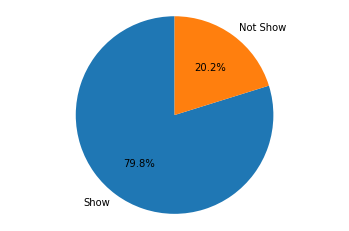

In [35]:
fig1, ax1 = plt.subplots()
ax1.pie([perc_show , perc_not_show] , labels=['Show', 'Not Show'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Resources : https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

Here we can see that 79,8% of the patients showed up for there appointments.

## 2- What is the age distribution of the patients?

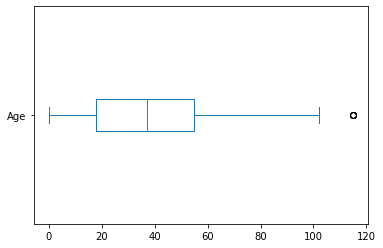

In [36]:
# using boxplot, we can see the distribution of the age of patients
df['Age'].plot(kind='box' , vert=False);

# Resource: https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4

In [37]:
# to get the mean, std, min, 1st quartile, 2nd quartile, 3rd quartile, and max for the Age.
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

We can observe that the majority of the patients are between the ages of 18 and 55. And the minimum age is 0, indicating that a newborn child has arrived for the appointment. The graph also shows that there is a patient who is 115 years old. 

## 3- Does The Gender May Affect If the patient Will Show Up For The Appointment or Not?

In [38]:
# getting the data for if the gender is female and did not show for the appointment
df_F_not_show = df[ (df["Gender"]=="F") &  (df["No-show"]=="Yes")]

# getting the data for if the gender is female and show for the appointment
df_F_show  = df[ (df["Gender"]=="F") &  (df["No-show"]=="No") ]

In [39]:
# getting the data for if the gender is male and did not show for the appointment
df_M_not_show = df[ (df["Gender"]=="M") &  (df["No-show"]=="Yes")]

# getting the data for if the gender is male and show for the appointment
df_M_show  = df[ (df["Gender"]=="M") &  (df["No-show"]=="No") ]

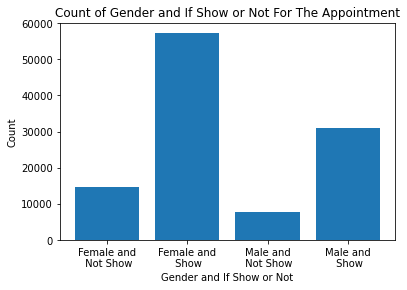

In [40]:
plt.bar([1, 2, 3, 4], [len(df_F_not_show), len(df_F_show), len(df_M_not_show), len(df_M_show)], 
        tick_label=["Female and\n Not Show", "Female and\n Show", "Male and\n Not Show", "Male and\n Show"])
plt.title('Count of Gender and If Show or Not For The Appointment')
plt.xlabel('Gender and If Show or Not')
plt.ylabel('Count');

Female patients are more likely to show up for the appointment than male patients.

***Note : But here becuase the number of female does not equal to male, we get the proportion for each gender so it will be out of 1 for each.

In [41]:
# function to get the proportion for each gender
def proportion(x,y):
    total = len(x) + len(y)
    proportion = len(x) / total
    return proportion

In [42]:
#proportion for female
prop_F_not_show = proportion( df_F_not_show , df_F_show )
prop_F_show = proportion( df_F_show , df_F_not_show )

#proportion for male
prop_M_not_show = proportion( df_M_not_show , df_M_show )
prop_M_show = proportion( df_M_show , df_M_not_show )

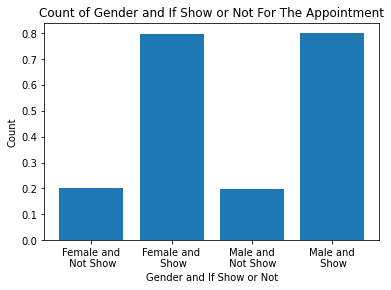

In [43]:
plt.bar([1, 2, 3, 4], [prop_F_not_show, prop_F_show, prop_M_not_show, prop_M_show], 
        tick_label=["Female and\n Not Show", "Female and\n Show", "Male and\n Not Show", "Male and\n Show"])
plt.title('Count of Gender and If Show or Not For The Appointment')
plt.xlabel('Gender and If Show or Not')
plt.ylabel('Count');

Now we can see tha bot female and male have approximately same percentage of showing to the appointment. Also, both female and male have approximately same percentage of not showing to the appointnent.

## 4- Does Younger Patients Show Up To The Appointment More Than Older Patients or Not?

In [44]:
# to get the data for the patient if he/she does not show up for the appointment
No_Show_not_show = df["No-show"] == "Yes"   

# to get the data for the patient if he/she showed up for the appointment
No_Show_show = df["No-show"]== "No"   

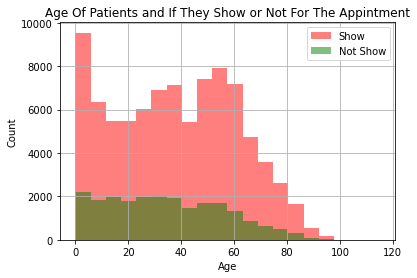

In [45]:
# to graph patients that show up for the appointment
df.Age[No_Show_show].hist(alpha=0.5, bins=20, label='Show' , color="red") 

# to graph patients who did no show for the appointment
df.Age[No_Show_not_show].hist(alpha=0.5,bins=20, label='Not Show' , color="green")

plt.title('Age Of Patients and If They Show or Not For The Appintment')
plt.xlabel('Age')
plt.ylabel('Count');
plt.legend();
# younger are more likely to show for the appointment

***Here we can see that most of younger patients show for their appointments. ***

## 5- Does Having A Scholarship Affect If The Patient Will Show For The Appointment or Not?

#### To get the unique values for Scholarship and the count for each unique value

In [46]:
df["Scholarship"].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

In [47]:
# to get the data if the patient has Scholarship and did not show for the appointment
df_s_not_show = df[ (df["Scholarship"]==1) &  (df["No-show"]=="Yes")]

# to get the data if the patient has Scholarship and show for the appointment
df_s_show  = df[ (df["Scholarship"]==1) &  (df["No-show"]=="No") ]

In [48]:
# to get the data if the patient does not have Scholarship and did not show for the appointment
df_n_not_show = df[ (df["Scholarship"]==0) &  (df["No-show"]=="Yes")]

# to get the data if the patient does not have Scholarship and show for the appointment
df_n_show  = df[ (df["Scholarship"]==0) &  (df["No-show"]=="No") ]

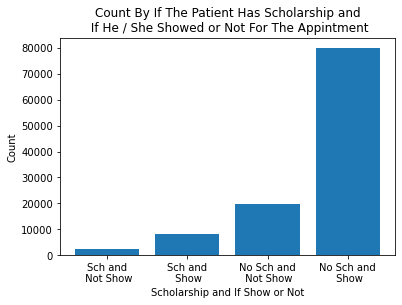

In [49]:
plt.bar([1, 2, 3, 4], [len(df_s_not_show), len(df_s_show), len(df_n_not_show), len(df_n_show)], 
        tick_label=["Sch and\n Not Show", "Sch and\n Show", "No Sch and\n Not Show", "No Sch and\n Show"])
plt.title('Count By If The Patient Has Scholarship and\n If He / She Showed or Not For The Appintment')
plt.xlabel('Scholarship and If Show or Not')
plt.ylabel('Count');

Here we can see that patients having a scholarship have a very lower percentage of showing to the appointment, as the opposite of patients having no scholarship have a higher percentage of showing to the appointmnet.

## 6- Does Sending an SMS Will Increase The Prcentage Of Showing Up To The Appointment?

#### To get the unique values for SMS_received and the count for each unique value

In [50]:
df["SMS_received"].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [51]:
# to get the data if the patient received SMS and did not show for the appointment
sms_not_show = df[ (df["SMS_received"]==1) &  (df["No-show"]=="Yes")]

# to get the data if the patient received SMS and show for the appointment
sms_show  = df[ (df["SMS_received"]==1) &  (df["No-show"]=="No") ]

In [52]:
# to get the data if the patient did not received SMS and did not show for the appointment
n_sms_not_show = df[ (df["SMS_received"]==0) &  (df["No-show"]=="Yes")]

# to get the data if the patient did not received SMS and show for the appointment
n_sms_show  = df[ (df["SMS_received"]==0) &  (df["No-show"]=="No") ]

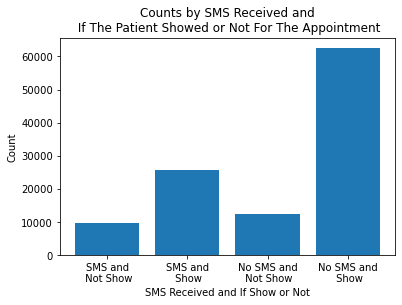

In [53]:
plt.bar([1, 2, 3, 4], [len(sms_not_show), len(sms_show), len(n_sms_not_show), len(n_sms_show)], 
        tick_label=["SMS and\n Not Show", 
                    "SMS and\n Show", 
                    "No SMS and\n Not Show", 
                    "No SMS and\n Show"])
plt.title("Counts by SMS Received and\n If The Patient Showed or Not For The Appointment")
plt.xlabel('SMS Received and If Show or Not')
plt.ylabel('Count');

Here we can see that most of patients showed up for their appointment did not received an SMS message in the first rank, and in the second rank are patients who received an SMS message and showed up for their appointment.

------------------------------------------------------------------------

# Conclusion:

After answering all the questions above, we can see that 79,8% of the patients showed up for their appointment and that the majority of the patients are between the ages of 18 and 55. The gender of the patient has no effect on whether or not the patient will show up or not for the appointment. But we can see that the age can play a role of predicting if the patient will show or not. For example, younger patients have a higher percentage of showing up to their appointments due to that most younger patients may get sick easily as the opposite of older people. Also, a lot of patients do not have scholarship showed up for their appointments. Although sending an SMS message may have the effect of reminding the patient about the appointment, the majority of patients who did not get any SMS messages showed up to their appointments. One of the limitations that we don't know about is the distance from the patient home to the hospital, because some patients may get stuck in traffic. So knowing this information can be important to predict if the patient will show up for the appointment or not.